In [108]:
using Revise
include("../src/update.jl")

FatTail (generic function with 1 method)

In [109]:
M = Model(N=10^5,T=8,γp=0.15,λp=0.2,distribution=FatTail(3:50,3),dilution=0.5);

In [110]:
using ProgressMeter
function Callback(iterations)
    p = Progress(iterations)
    function callback(it, M)
        next!(p)
    end
end

iterations = 30

using Profile
Profile.clear()
@profile pop_dynamics!(M; iterations, callback = Callback(iterations))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:44


In [111]:
using Plots
N, T = popsize(M), M.T
omarg2D = fill(0.0, 0:T+1, 0:T+1)
for i in 1:N
    for t in 0:T+1
        omarg2D[t, M.τbelief[i]] += M.belief[t,i]/N
    end
end
marg2D = omarg2D.parent;

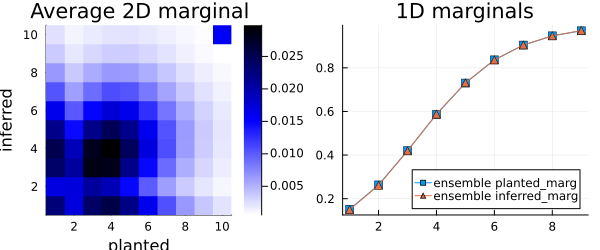

In [112]:
pheat = heatmap((marg2D'),c=[:white,:blue,:black],xlabel="planted",ylabel="inferred",title="Average 2D marginal")
p0 = plot(cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1),marker=:square,label="ensemble planted_marg",title="1D marginals")
p0 = plot!(cumsum(sum(marg2D,dims=2)[1:end-1],dims=1),marker=:utriangle,label="ensemble inferred_marg",legend=:bottomright)
plot(pheat,p0,size=(600,250))

In [102]:
[cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1) cumsum(sum(marg2D,dims=2)[1:end-1],dims=1)]

9×2 Matrix{Float64}:
 0.14865  0.147863
 0.2217   0.216635
 0.3085   0.297174
 0.40037  0.386498
 0.49303  0.479447
 0.5816   0.569711
 0.65814  0.651529
 0.72338  0.721146
 0.7747   0.777311

In [70]:
M.belief[:,1]

10-element OffsetArray(::Vector{Float64}, 0:9) with eltype Float64 with indices 0:9:
 0.14199992631708452
 0.0582745816220569
 0.06911973537312432
 0.08143523735300923
 0.0927875004785745
 0.09971964218607893
 0.0985248681117109
 0.08715835016746984
 0.06813744676542305
 0.20284271162546777